# Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

In [1]:
# Importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

In [2]:
# converting csv file into dataframe
df = pd.read_csv("/content/drive/MyDrive/digikull all/digikull/Final Projects/Healthcare Stroke Data EDA/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
# checking shape of dataframe
df.shape

(5110, 12)

In [4]:
# checking columns of dataframe
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# checking info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# checking stats of dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# checking nulls in dataframe
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### So we have null values in bmi column we can replace it with mean.

In [8]:
# finding mean of bmi column
mean_bmi = df.bmi.mean(axis=0)
mean_bmi

28.893236911794666

In [9]:
# filling null values in bmi column with mean bmi
df["bmi"].fillna(mean_bmi,inplace= True)

In [10]:
# Again checking null values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Hence we got clean dataset

# EDA

In [11]:
# creating dataframe to count by gender
a = df.groupby(["gender"],as_index= False)["gender"].agg(["count"])
a

,count
gender,
Female,2994
Male,2115
Other,1


In [12]:
a.index

Index(['Female', 'Male', 'Other'], dtype='object', name='gender')

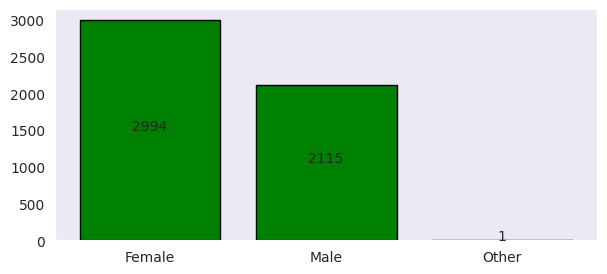

In [13]:
plt.figure(figsize=(7,3))
barplot1 = plt.bar(a.index,a["count"],fc="g",ec="black")
plt.bar_label(barplot1,labels=a["count"],label_type="center",padding=3)
plt.show()

In [14]:
# creating dataframe to count patient are suffering from hypertension
b=df.groupby(["hypertension"])["hypertension"].agg(["count"])
b

,count
hypertension,
0,4612
1,498


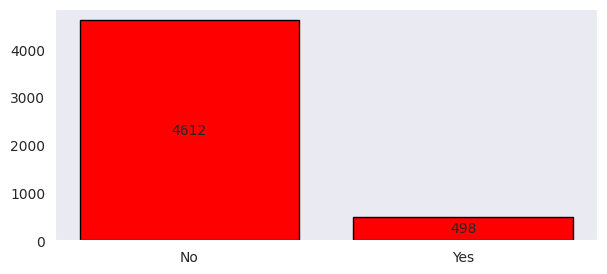

In [15]:
plt.figure(figsize=(7,3))
barplot2 = plt.bar(x=["No","Yes"],height=b["count"],fc="r",ec="black")
plt.bar_label(barplot2,labels=b["count"],label_type="center")
plt.show()

In [16]:
# Creating a dataframe Mean BMI by Work Type
c = df.groupby(["work_type"],as_index=False)["bmi"].agg(["mean"])
c

,mean
work_type,
Govt_job,30.455125
Never_worked,25.545455
Private,30.249617
Self-employed,30.141029
children,20.244238


In [17]:
round(c["mean"],2)

work_type
Govt_job         30.46
Never_worked     25.55
Private          30.25
Self-employed    30.14
children         20.24
Name: mean, dtype: float64

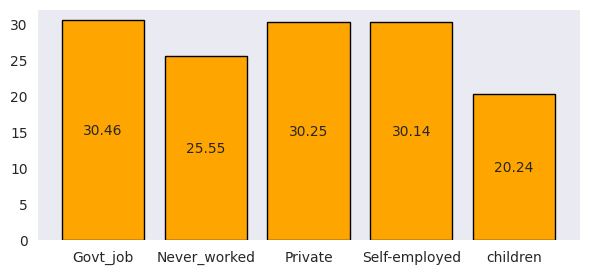

In [18]:
plt.figure(figsize = (7,3))
barplot3= plt.bar(c.index,c["mean"],fc="orange",ec="black")
plt.bar_label(barplot3,labels=round(c["mean"],2),label_type="center")
plt.show()

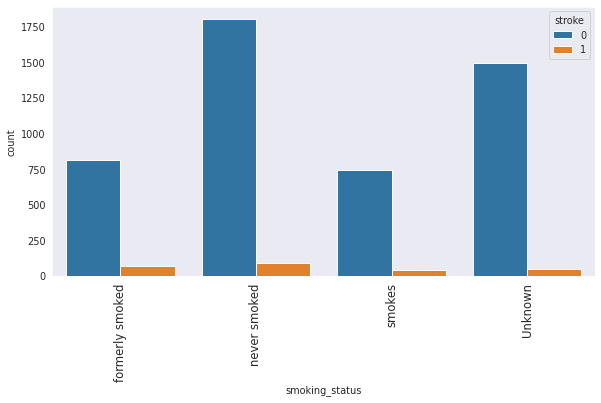

In [19]:
# Strokes by Smoking status
# Ploting using seaborn(sns) countplot
fig = plt.figure(figsize=(10,5), dpi = 70)
sns.countplot(data=df, x = "smoking_status",hue='stroke')
plt.xticks(rotation=90,fontsize=12);

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [22]:
# converting dataframe into excel file
df.to_excel("Healthcare_clean_data.xlsx")